<a href="https://colab.research.google.com/github/sayakpaul/robustness-vit/blob/master/misc/Visualize_Freq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2

In [ ]:
!wget -q https://picsum.photos/237 -O picsum.jpg
!wget -q http://images.cocodataset.org/val2017/000000039769.jpg -O cat.jpg

In [ ]:
def load_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image)
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.uint8)
    return image

# Reference: https://t.ly/t5TI
def get_magnitude_spec(image):
    image = tf.image.rgb_to_grayscale(image).numpy()
    image = image.squeeze()
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    return magnitude_spectrum

# Reference: https://www.tensorflow.org/tutorials/generative/style_transfer
def get_high_freq_comp(image):
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = image[None, ...]
    sobel = tf.image.sobel_edges(image).numpy()
    sobel = tf.squeeze(sobel)
    return np.clip(sobel[..., 0]/4+0.5, 0., 1.)

In [ ]:
def visualize_high_freq(paths):
    fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(13, 9))
    [ax.axis("off") for ax in np.ravel(axes)] 

    for i, ((ax_orig, ax_magntitude, ax_comp), path) in enumerate(zip(axes, paths)):
        image = load_image(path)
        magnitude = get_magnitude_spec(image)
        high_freq = get_high_freq_comp(image)

        ax_orig.imshow(image)
        ax_magntitude.imshow(magnitude, cmap="gray") 
        ax_comp.imshow(high_freq)
        
        if i == 0:
            ax_orig.set_title("Original Image", fontsize=16, pad=20)
            ax_magntitude.set_title("Magnitude Spectrum", fontsize=16, pad=20)
            ax_comp.set_title("High-frequency Components", fontsize=16, pad=20)

    fig.tight_layout()
    fig.savefig("freq_analysis.png", dpi=300, bbox_inches="tight")

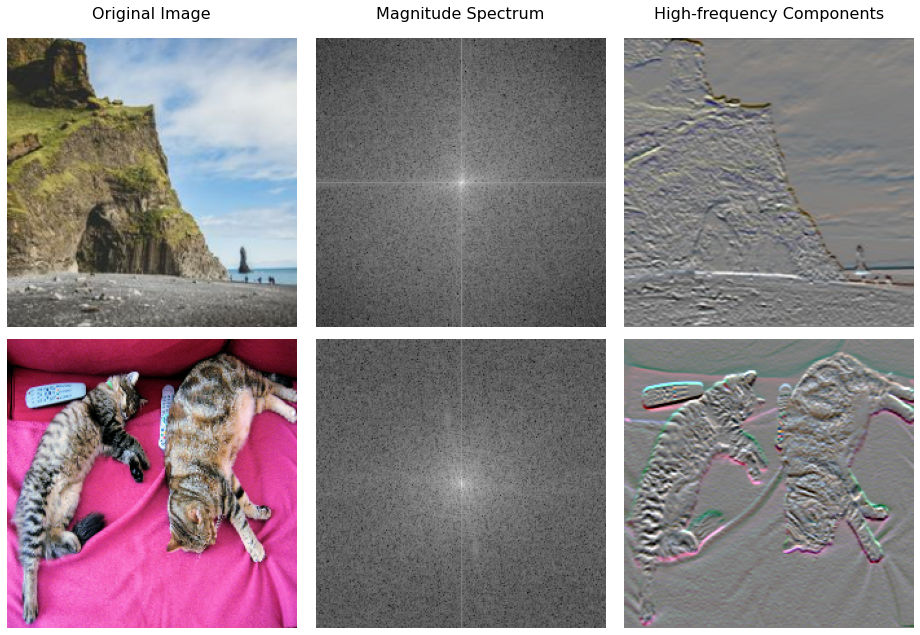

In [ ]:
paths = ["picsum.jpg", "cat.jpg"]
visualize_high_freq(paths)